Chapter 21
# 蒙特卡罗模拟时间序列切片
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 创建日期范围，假设为2年（365*2天）
date_range = pd.date_range(start='2023-01-01', 
                           periods=365*2, freq='D')

In [3]:
# 创建一个空的 DataFrame，用于存储随机行走数据
df = pd.DataFrame(index=date_range)
df.head()

""
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05


In [4]:
# 模拟50个随机行走
num_path = 50
# 设置随机种子以保证结果可重复
np.random.seed(0)  

In [5]:
for i in range(num_path):
    # 生成随机步长，每天行走步长服从标准正态分布
    step_idx = np.random.normal(loc=0.0, scale=1.0, 
                                size=len(date_range) - 1)
    # 增加初始状态
    step_idx = np.append(0, step_idx)
    
    # 计算累积步数
    walk_idx = step_idx.cumsum()
    
    # 将行走路径存储在DataFrame中，列名为随机行走编号
    df[f'Walk_{i + 1}'] = walk_idx
# 请大家想办法去掉for循环

(-80.0, 80.0)

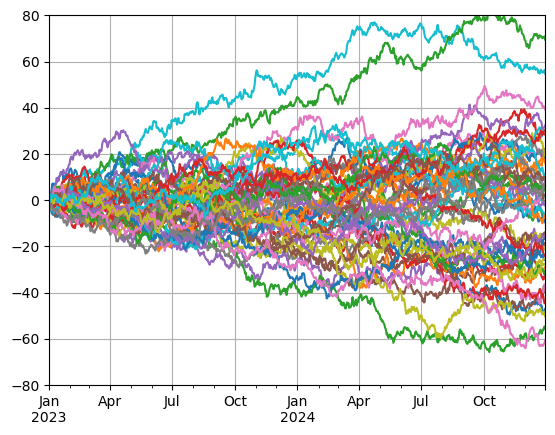

In [6]:
# 绘制所有随机行走轨迹
df.plot(legend = False)
plt.grid(True)
plt.ylim(-80,80)

(-80.0, 80.0)

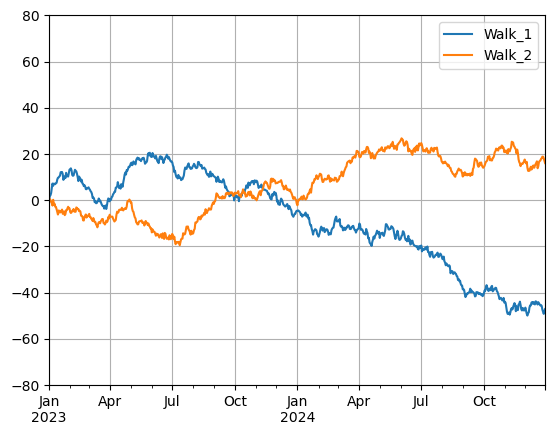

In [7]:
# 绘制前两条随机行走
# df.iloc[:, [1, 0]].plot(legend = True)
df[['Walk_1', 'Walk_2']].plot(legend = True)
plt.grid(True)
plt.ylim(-80,80)

(-80.0, 80.0)

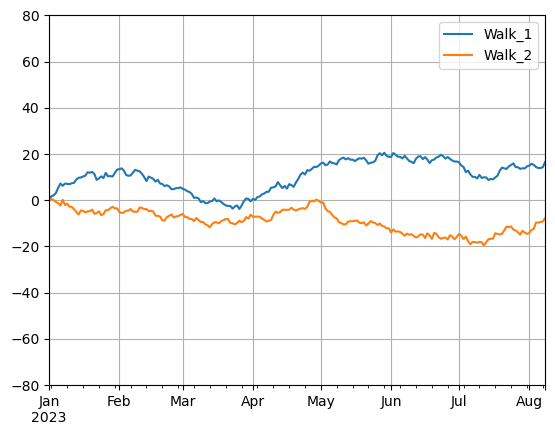

In [8]:
# 绘制前两条随机行走，特定时间段
df.loc['2023-01-01':'2023-08-08', 
       ['Walk_1', 'Walk_2']].plot(legend = True)
# df.iloc[0:220, 0:2].plot(legend = True)
plt.grid(True)
plt.ylim(-80,80)